In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy.interpolate as interp
from sys import platform

In [2]:
if platform=='win32':
    %run utils\getFMext
else:  
    %run utils/getFMext.py

In [3]:
if platform=='win32':
    %run utils\getMag.py
else:  
    %run utils/getMag.py

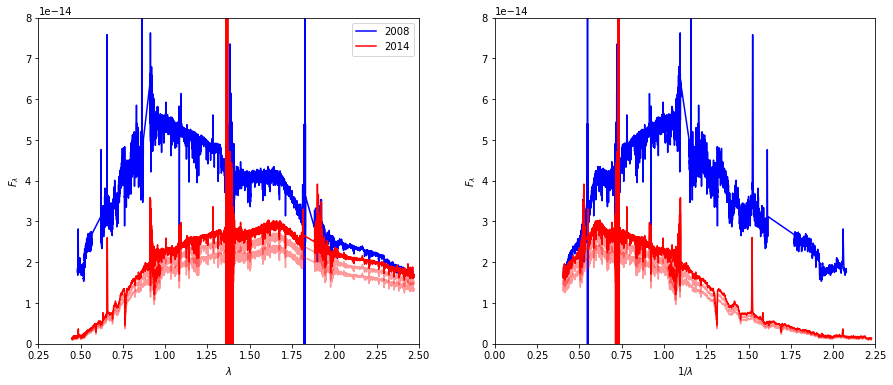

In [35]:
   
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(15,6))
x1,f1=np.loadtxt('AATau_IR2008.txt',unpack=True)
x2,f2=np.loadtxt('AATau_opt2008.txt',unpack=True)
x3,f3=np.loadtxt('AATau_IR2014dec02.txt',unpack=True)
x4,f4=np.loadtxt('AATau_opt2014dec02.txt',unpack=True)
    
# mask out the NaNs:
def maskNans(wavelength,data):
    masked_data=data[np.logical_not(np.isnan(data))]
    masked_wavelength=wavelength[np.logical_not(np.isnan(data))]
    return (masked_wavelength,masked_data)

x1,f1=maskNans(x1,f1)
x2,f2=maskNans(x2,f2)
x3,f3=maskNans(x3,f3)
x4,f4=maskNans(x4,f4)
    
xobs1,fobs1=np.append(x2,x1)[1500:],np.append(f2,f1)[1500:]
xobs2,fobs2=np.append(x4,x3)[500:],np.append(f4,f3)[500:]
    
ax1.plot(xobs1, fobs1, label='2008',color='blue')
ax1.set_ylim(0,0.8E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('$F_\lambda$')
ax1.plot(xobs2, 0.8*fobs2, color='red', alpha=0.4)
ax1.plot(xobs2, 0.9*fobs2, color='red', alpha=0.4)
ax1.plot(xobs2, fobs2, label='2014',color='red')
    
ax1.legend(loc='best')

ax2.plot(1./xobs1, fobs1, color='blue')
ax2.set_ylim(0,0.8E-13)
ax2.set_xlim(0,2.25)
ax2.set_xlabel('1/$\lambda$')
ax2.set_ylabel('$F_\lambda$')   
ax2.plot(1./xobs2, 0.8*fobs2, color='red', alpha=0.4)
ax2.plot(1./xobs2, 0.9*fobs2, color='red', alpha=0.4)
ax2.plot(1./xobs2, fobs2, color='red')

plt.show()

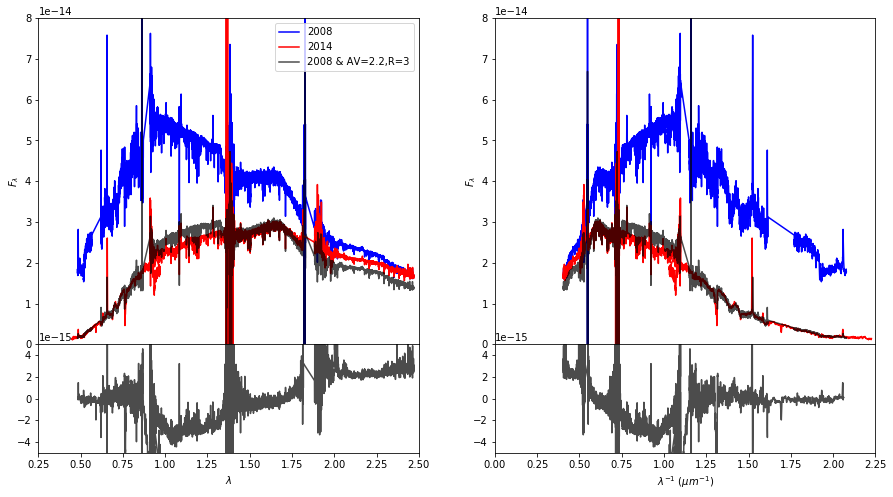

In [43]:

fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(2,2,figsize=(15,8),gridspec_kw = {'height_ratios':[3, 1]})

fig.subplots_adjust(hspace=0)

ax1.plot(xobs1, fobs1, color='blue',label='2008')
ax1.set_ylim(0,0.8E-13)
ax1.set_xlim(0.25,2.5)
ax1.xaxis.set_visible(False)
ax1.set_ylabel('$F_\lambda$')    

ax1.plot(xobs2, fobs2, color='red', label='2014')



ax2.plot(1./xobs1, fobs1, color='blue')
ax2.set_ylim(0,0.8E-13)
ax2.set_xlim(0,2.25)
ax2.xaxis.set_visible(False)
ax2.set_ylabel('$F_\lambda$')    

ax2.plot(1./xobs2, fobs2, color='red')

Av=2.2
Rv=3.

fobs1ext = fobs1 * 10.**(-0.4*Av*getFMext(xobs1,Rv,'fmunred')/Rv)
ax1.plot(xobs1, fobs1ext, color='black',label="2008 & AV=2.2,R=3",alpha=0.7)
ax2.plot(1./xobs1, fobs1ext, color='black',alpha=0.7)


ax1.legend(loc='upper right')

fext=interp.interp1d(xobs1,fobs1ext)
ax3.plot(xobs2[150:],fobs2[150:]-fext(xobs2[150:]),color='black',alpha=0.7)
ax3.set_ylim(-0.05E-13,0.05E-13)
ax3.set_xlim(0.25,2.5)
ax3.set_xlabel('$\lambda$')

ax4.plot(1./xobs2[150:],fobs2[150:]-fext(xobs2[150:]),color='black',alpha=0.7)
ax4.set_ylim(-0.05E-13,0.05E-13)
ax4.set_xlim(0,2.25)
ax4.set_xlabel('$\lambda^{-1}\ (\mu m^{-1})$')

plt.show()

/Users/kristen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10
/Users/kristen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/kristen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in log10


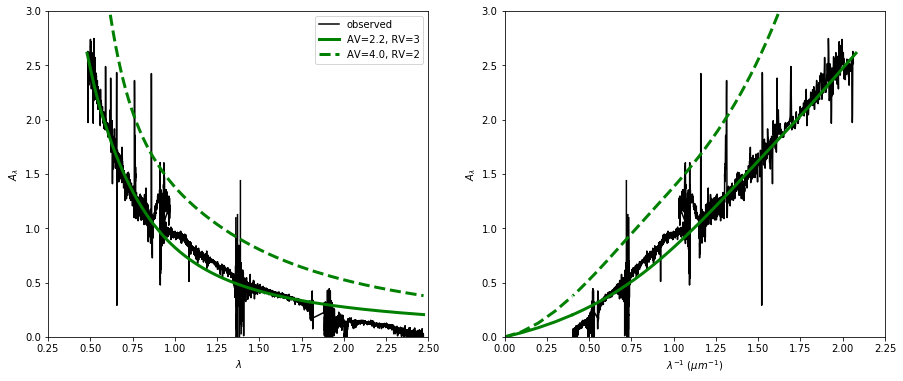

In [56]:
fig,[ax3,ax4]=plt.subplots(1,2,figsize=(15,6))


finterp=interp.interp1d(xobs1,fobs1)

ax3.plot(xobs2[150:],-2.5*np.log10(fobs2[150:]/finterp(xobs2[150:])),color='black',label='observed')
Av=2.2
Rv=3.
ax3.plot(xobs1,Av*getFMext(xobs1,Rv,'fmunred')/Rv,'g-',label='AV=2.2, RV=3',linewidth=3)
Av=4.
Rv=2.
ax3.plot(xobs1,Av*getFMext(xobs1,Rv,'fmunred')/Rv,'g--',label='AV=4.0, RV=2',linewidth=3)
ax3.set_ylim(0,3)
ax3.set_xlim(0.25,2.5)
ax3.legend(loc='best')
ax3.set_xlabel('$\lambda$')
ax3.set_ylabel('$A_\lambda$')    

x=1./np.array([0,.1,.2,.3,.4])

ax4.plot(1./xobs2[150:],-2.5*np.log10(fobs2[150:]/finterp(xobs2[150:])),color='black')
Av=2.2
Rv=3.
ax4.plot(1./xobs1,Av*getFMext(xobs1,Rv,'fmunred')/Rv,'g-',label='AV=2.2, RV=3',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv,'g-',linewidth=3)

Av=4.
Rv=2.
ax4.plot(1./xobs1,Av*getFMext(xobs1,Rv,'fmunred')/Rv,'g--',label='AV=4.0, RV=2',linewidth=3)
ax4.plot(1./x,Av*getFMext(x,Rv,'fmunred')/Rv,'g--',linewidth=3)

ax4.set_ylim(0,3)
ax4.set_xlim(0,2.25)
ax4.set_xlabel('$\lambda^{-1}\ (\mu m^{-1})$')
ax4.set_ylabel('$A_\lambda$')    

plt.show()
  

## to do:  add possible scalings to the black curve.... then do the photometry plots